In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot  as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/KarinkiManikanta/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/Human_Resources_Employee_Attrition.csv")

In [3]:
data.head(3)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [5]:
data.tail(4)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

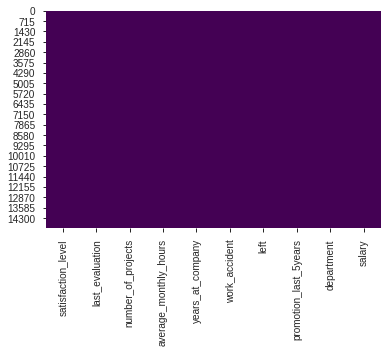

In [9]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

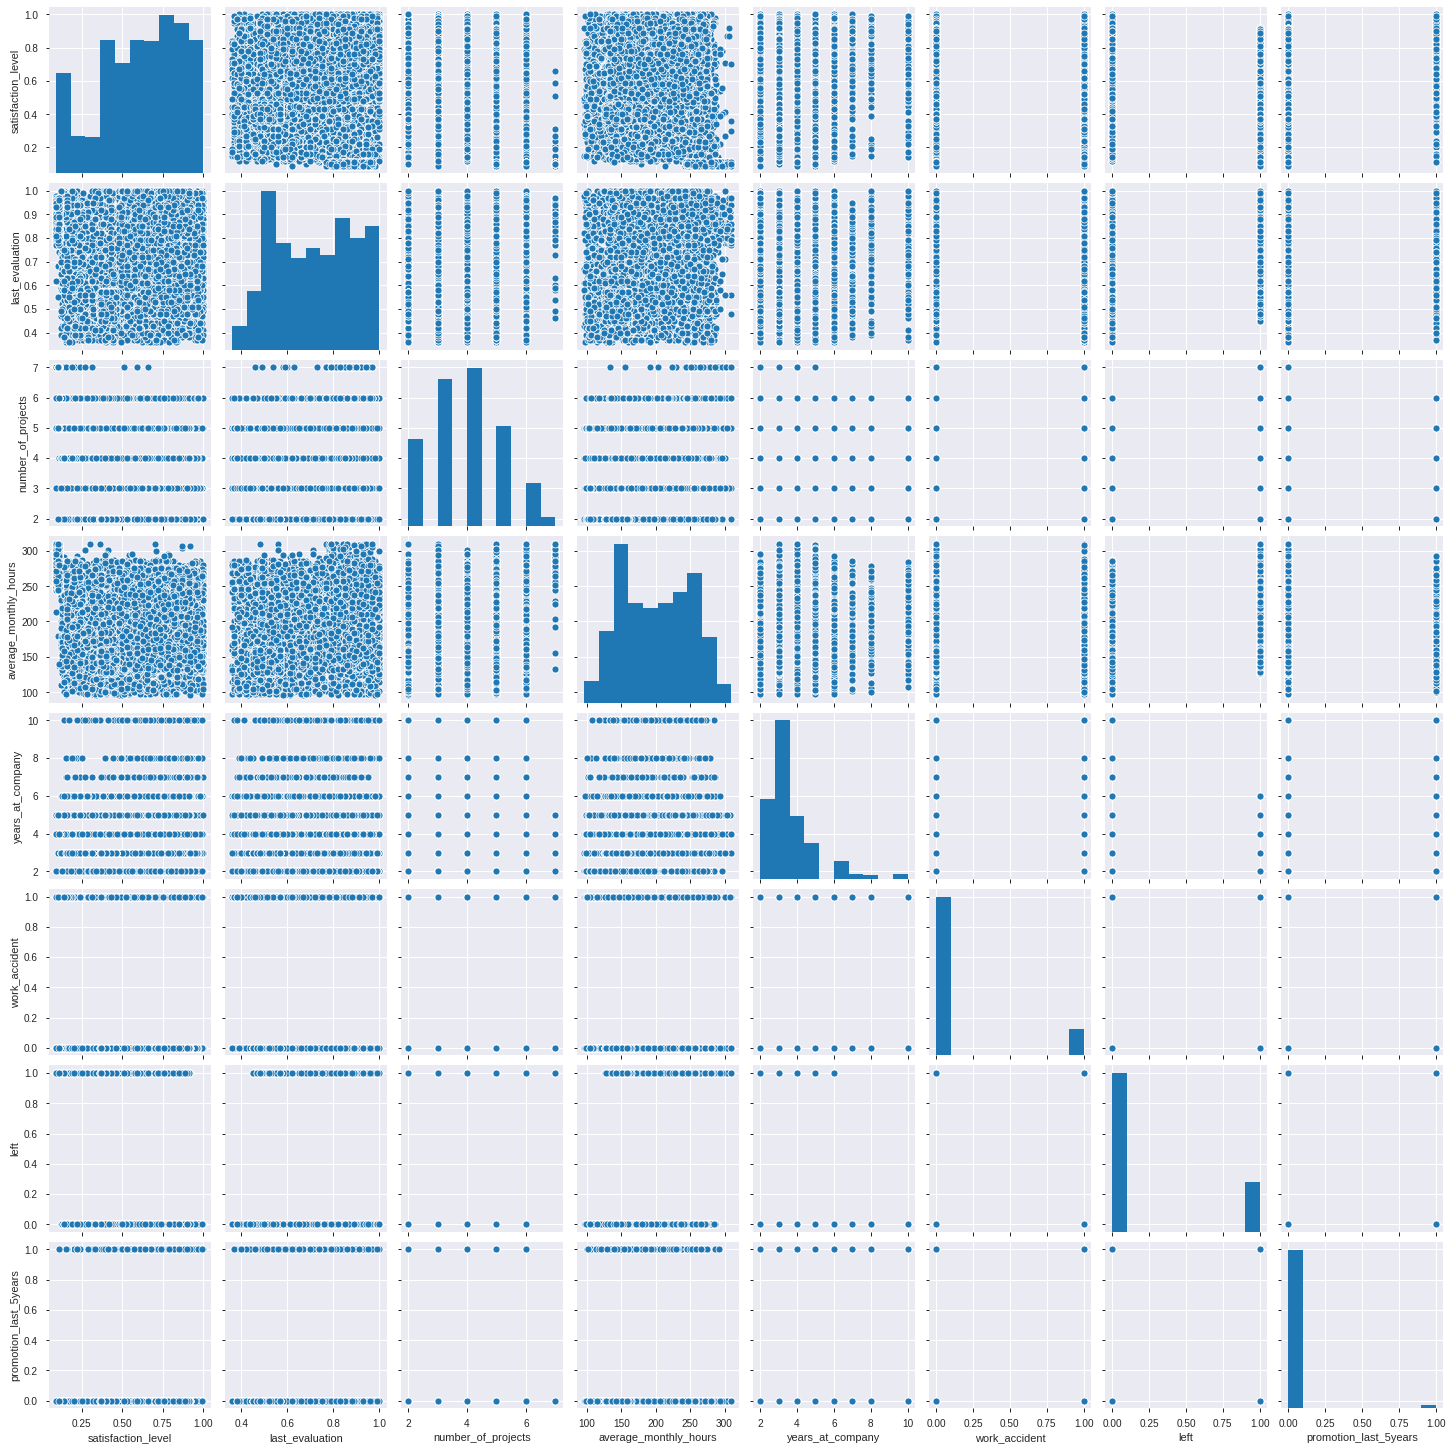

In [10]:
sns.pairplot(data)

In [11]:
pandas_profiling.ProfileReport(data)

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
data

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
data["department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [23]:
data["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [24]:
depart={'sales':0,'technical':1,'support':2,'IT':3,'product_mng':4,'marketing':5,'RandD':6,'accounting':7,'hr':8,'management':9 }
data['department']=data['department'].map(depart)

In [25]:
sala={'low':0,'medium':1,'high':2}
data['salary']=data['salary'].map(sala)

In [26]:
data.head(3)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1


In [28]:
data.tail(2)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
14997,0.11,0.96,6,280,4,0,1,0,2,0
14998,0.37,0.52,2,158,3,0,1,0,2,0


In [30]:
from sklearn.model_selection import train_test_split
x=data.drop('salary',axis=1)
y=data['salary']


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11999, 9)
(11999,)
(3000, 9)
(3000,)


In [37]:
from sklearn.svm import SVC
clf=BaggingClassifier(base_estimator=SVC())
clf.fit(x,y)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [38]:
trine_score=clf.score(x_train,y_train)
trine_score

0.48429035752979416

In [39]:
test_score=clf.score(x_test,y_test)
test_score

0.5016666666666667

In [40]:
yhat=clf.predict(x_test)

In [41]:
pd.DataFrame({'Acutual Data':y_test,'New_prediction':yhat})

,Acutual Data,New_prediction
9662,1,0
3580,0,0
11709,2,0
13357,0,0
9190,1,0
...,...,...
10825,1,0
7320,0,0
5360,1,0
4087,1,0


In [42]:
#Accuracy Evaluation
from sklearn import metrics
print("Trine Set Accuracy:",metrics.accuracy_score(y_train,clf.predict(x_train)))
print("Test Set Accuracy:",metrics.accuracy_score(y_test,yhat))

Trine Set Accuracy: 0.48429035752979416
Test Set Accuracy: 0.5016666666666667


In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

print(confusion_matrix(y_test,yhat)) 
print(classification_report(y_test,yhat))

[[1505    0    0]
 [1264    0    0]
 [ 231    0    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1505
           1       0.00      0.00      0.00      1264
           2       0.00      0.00      0.00       231

    accuracy                           0.50      3000
   macro avg       0.17      0.33      0.22      3000
weighted avg       0.25      0.50      0.34      3000

